In [2]:
from sklearn import datasets
import pandas as pd
import numpy as np
df =pd.read_csv('/home/shobhit/Downloads/forestfires.csv', na_values=['NA'])
y = df.iloc[140:500, 12].values
print(y)
X = df.iloc[140:500, [4,9]].values

[  4.70000000e-01   5.50000000e-01   6.10000000e-01   7.10000000e-01
   7.70000000e-01   9.00000000e-01   9.50000000e-01   9.60000000e-01
   1.07000000e+00   1.12000000e+00   1.19000000e+00   1.36000000e+00
   1.43000000e+00   1.46000000e+00   1.46000000e+00   1.56000000e+00
   1.61000000e+00   1.63000000e+00   1.64000000e+00   1.69000000e+00
   1.75000000e+00   1.90000000e+00   1.94000000e+00   1.95000000e+00
   2.01000000e+00   2.14000000e+00   2.29000000e+00   2.51000000e+00
   2.53000000e+00   2.55000000e+00   2.57000000e+00   2.69000000e+00
   2.74000000e+00   3.07000000e+00   3.50000000e+00   4.53000000e+00
   4.61000000e+00   4.69000000e+00   4.88000000e+00   5.23000000e+00
   5.33000000e+00   5.44000000e+00   6.38000000e+00   6.83000000e+00
   6.96000000e+00   7.04000000e+00   7.19000000e+00   7.30000000e+00
   7.40000000e+00   8.24000000e+00   8.31000000e+00   8.68000000e+00
   8.71000000e+00   9.41000000e+00   1.00100000e+01   1.00200000e+01
   1.09300000e+01   1.10600000e+01

In [3]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

/home/shobhit/.local/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [5]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split
tree = DecisionTreeClassifier(max_depth=4,random_state = 0)
tree.fit(X_train,y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test,y_test)))

Accuracy on training set: 0.925
Accuracy on test set: 0.926


In [11]:
from sklearn.tree import export_graphviz

In [30]:
export_graphviz(tree,out_file='tree.dot',class_names=['burned(area==0)','Notburned(area>0)'],feature_names=['FFMC', 'temp'],impurity=False,filled=True)

In [31]:
import graphviz

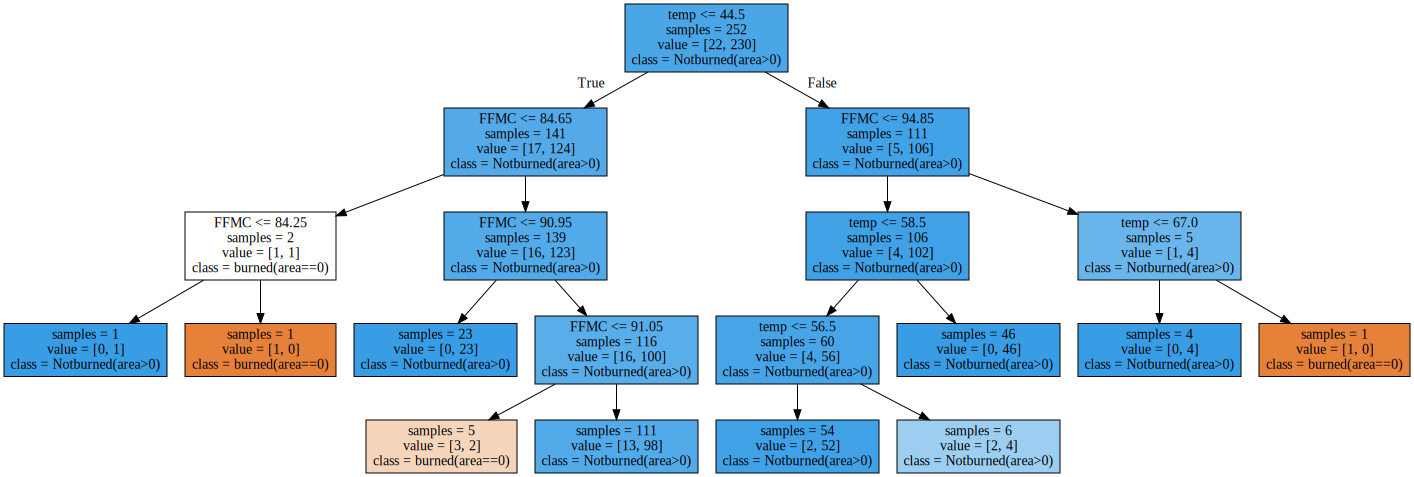

In [33]:
with open("/home/shobhit/Downloads/tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
import pandas as pd
import numpy as np
df =pd.read_csv('/home/shobhit/Downloads/forestfires.csv', na_values=['NA'])
feat_labels = df.columns[4:]
feat_labels
y = df.iloc[1:300, 9].values
y = np.where(y>40, -1, 1)
X = df.iloc[1:300, 4:].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
forest = RandomForestClassifier(n_estimators=10000,random_state=0,n_jobs=-1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,feat_labels[f],importances[indices[f]]))

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]),
importances[indices],
color='lightblue',
align='center')
plt.xticks(range(X_train.shape[1]),
feat_labels, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()